In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
# Make the model - 5 layers with sigmoid activation
nLayers = [200, 100, 50, 25, 10]
X = tf.placeholder(tf.float32, [None, 28*28])
W1 = tf.Variable(tf.truncated_normal([28*28, nLayers[0]], stddev=0.1))
b1 = tf.Variable(tf.zeros([nLayers[0]]))

W2 = tf.Variable(tf.truncated_normal([nLayers[0], nLayers[1]], stddev=0.1))
b2 = tf.Variable(tf.zeros([nLayers[1]]))

W3 = tf.Variable(tf.truncated_normal([nLayers[1], nLayers[2]], stddev=0.1))
b3 = tf.Variable(tf.zeros([nLayers[2]]))

W4 = tf.Variable(tf.truncated_normal([nLayers[2], nLayers[3]], stddev=0.1))
b4 = tf.Variable(tf.zeros([nLayers[3]]))

W5 = tf.Variable(tf.truncated_normal([nLayers[3], nLayers[4]], stddev=0.1))
b5 = tf.Variable(tf.zeros([nLayers[4]]))

In [4]:
init = tf.global_variables_initializer()

In [5]:
# Model
Y1 = tf.nn.relu( tf.matmul(X, W1) + b1 )
Y2 = tf.nn.relu( tf.matmul(Y1, W2) + b2 )
Y3 = tf.nn.relu( tf.matmul(Y2, W3) + b3 )
Y4 = tf.nn.relu( tf.matmul(Y3, W4) + b4 )
Y5 = tf.nn.softmax( tf.matmul(Y4, W5) + b5 ) * (1-1e-8) + 1e-8
# Ground truth
Y_ = tf.placeholder(tf.float32, [None, 10])

In [6]:
# Loss
cost = -tf.reduce_sum(Y_ * tf.log(Y5))

In [7]:
# Nb of correct answers in batch
is_correct = tf.equal( tf.argmax(Y_, 1), tf.argmax(Y5, 1) )
accuracy = tf.reduce_mean( tf.cast(is_correct, tf.float32))

In [8]:
dec = 0.003 / np.exp( np.array(range(10000))/3000 )
dec[0]

0.0030000000000000001

In [9]:
# Training - set training method
decay = tf.placeholder(tf.float32)
optimizer = tf.train.GradientDescentOptimizer( decay )
# Training - make a step
train_step = optimizer.minimize(cost)

In [10]:
# Load data
import utils.RBrown_input_data as rbm
dt_path = '/Users/younes_zerouali/Documents/Stradigi/Databases/MNIST' 
mnist = rbm.read_data_sets(dt_path, one_hot=True)

Extracting /Users/younes_zerouali/Documents/Stradigi/Databases/MNIST/train-images-idx3-ubyte.gz
Extracting /Users/younes_zerouali/Documents/Stradigi/Databases/MNIST/train-labels-idx1-ubyte.gz
Extracting /Users/younes_zerouali/Documents/Stradigi/Databases/MNIST/t10k-images-idx3-ubyte.gz
Extracting /Users/younes_zerouali/Documents/Stradigi/Databases/MNIST/t10k-labels-idx1-ubyte.gz


In [11]:
sess = tf.Session()
sess.run(init)

In [12]:
# Loop and train/test
ACCtr = []
LOStr = []
ACCts = []
LOSts = []
dec = 0.003 / np.exp( np.array(range(10000))/3000 )
for i,d in zip(range(10000), dec):
    # Get a batch
    batchX, batchY = mnist.train.next_batch(100)
    # TRAIN: make training dictionary
    trdict = {X:batchX, Y_:batchY, decay:d}
    # TRAIN: update weigths
    sess.run(train_step, feed_dict=trdict)
    # TRAIN: accuracy
    a,c = sess.run([accuracy, cost], feed_dict=trdict)
    ACCtr.append(a)    
    LOStr.append(c)
    # TEST
    testX, testY = mnist.test.next_batch(100)
    tsdict = {X:testX, Y_:testY}
    a,c = sess.run([accuracy, cost], feed_dict=tsdict)
    ACCts.append(a)    
    LOSts.append(c)
    if i%99==0: print('Accuracy at iteration %i: %f' %(i, a) )

Accuracy at iteration 0: 0.070000
Accuracy at iteration 99: 0.780000
Accuracy at iteration 198: 0.840000
Accuracy at iteration 297: 0.940000
Accuracy at iteration 396: 0.940000
Accuracy at iteration 495: 0.980000
Accuracy at iteration 594: 0.920000
Accuracy at iteration 693: 0.970000
Accuracy at iteration 792: 0.910000
Accuracy at iteration 891: 0.960000
Accuracy at iteration 990: 0.950000
Accuracy at iteration 1089: 0.980000
Accuracy at iteration 1188: 0.940000
Accuracy at iteration 1287: 0.980000
Accuracy at iteration 1386: 0.990000
Accuracy at iteration 1485: 0.980000
Accuracy at iteration 1584: 0.960000
Accuracy at iteration 1683: 0.950000
Accuracy at iteration 1782: 0.960000
Accuracy at iteration 1881: 0.940000
Accuracy at iteration 1980: 0.970000
Accuracy at iteration 2079: 0.970000
Accuracy at iteration 2178: 0.970000
Accuracy at iteration 2277: 0.980000
Accuracy at iteration 2376: 0.930000
Accuracy at iteration 2475: 1.000000
Accuracy at iteration 2574: 0.930000
Accuracy at ite

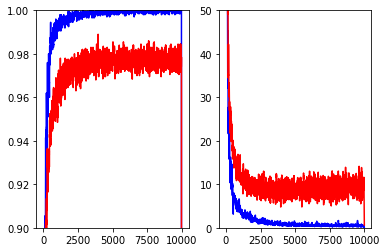

In [30]:
FIG = plt.figure()
N_run = 20

# Plot accuracy
Ax1 = FIG.add_subplot(121)
Ax1.plot( range(10000), np.convolve( np.concatenate( (ACCtr, np.zeros(N_run-1,)) ), np.ones((N_run,))/N_run, mode='valid'), 'b', label='training accuracy')
Ax1.plot( range(10000), np.convolve( np.concatenate( (ACCts, np.zeros(N_run-1,)) ), np.ones((N_run,))/N_run, mode='valid'), 'r', label='test accuracy')
Ax1.set_ylim([0.9, 1])
Ax1.x_label = 'Iteration number'

# Plot loss
Ax2 = FIG.add_subplot(122)
Ax2.plot( range(10000), np.convolve( np.concatenate( (LOStr, np.zeros(N_run-1,)) ), np.ones((N_run,))/N_run, mode='valid'), 'b', label='training loss')
Ax2.plot( range(10000), np.convolve( np.concatenate( (LOSts, np.zeros(N_run-1,)) ), np.ones((N_run,))/N_run, mode='valid'), 'r', label='test loss')
Ax2.set_ylim([0, 50])
Ax2.x_label = 'Iteration number'